In [3]:
# Imported Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly.offline import iplot

# Imported Classifier Libraries
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Other Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, \
 f1_score, roc_auc_score, accuracy_score, classification_report,\
 average_precision_score, confusion_matrix, precision_recall_curve

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
df.shape

(284807, 31)

In [6]:
print(df.info())
print(df.isnull().sum().max())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.628620e-16 -3.576577e-16  2.618565e-16  4.473914e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.109395e-16  1.686100e-15 -3.661401e-16 -1.227452e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

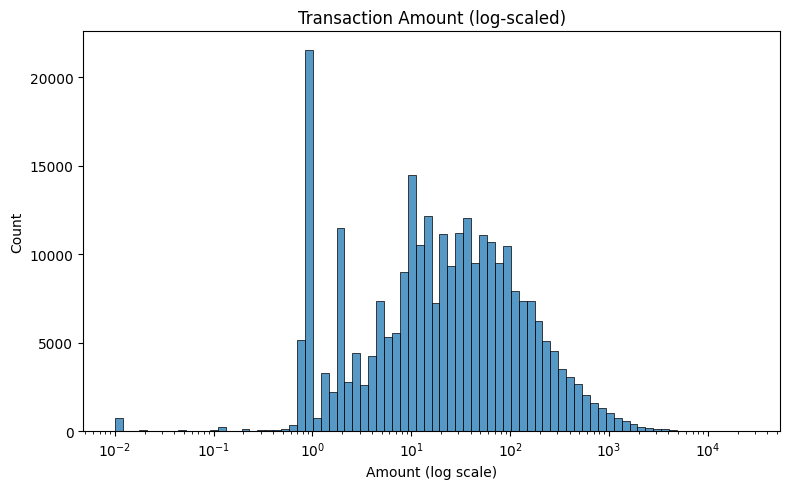

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Amount', bins=80, log_scale=(True, False), kde=False)
plt.title('Transaction Amount (log-scaled)')
plt.xlabel('Amount (log scale)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [9]:
#Creating the histogram
px.histogram(df,
            x='Class',
            title='Credit Card Fraud Class Distribution (Not fraud = 0, Fraud = 1)',
            text_auto = True
)

In [10]:
# The classes are heavily skewed we need to solve this issue later
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [11]:
#Creating the boxplot
fig = px.box(df, x='Class', y='Amount', points='outliers',
             labels={'Class': 'Transaction Type', 'Amount': 'Amount (log)'},
             title='Boxplot of Transaction Amount by Class', color = 'Class')

#Naming the transaction types and setting the amount to a log scale
fig.update_xaxes(ticktext=['Not Fraud', 'Fraud'], tickvals=[0, 1])
fig.update_yaxes(type='log')



In [12]:
# Splitting time data by fraudulent and legitimate transactions
time_class_0 = df.loc[df['Class'] == 0]['Time']
time_class_1 = df.loc[df['Class'] == 1]['Time']

# Creating the density plot with Plotly library
fig = ff.create_distplot([time_class_0, time_class_1], ['Not Fraud', 'Fraud'], show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig)

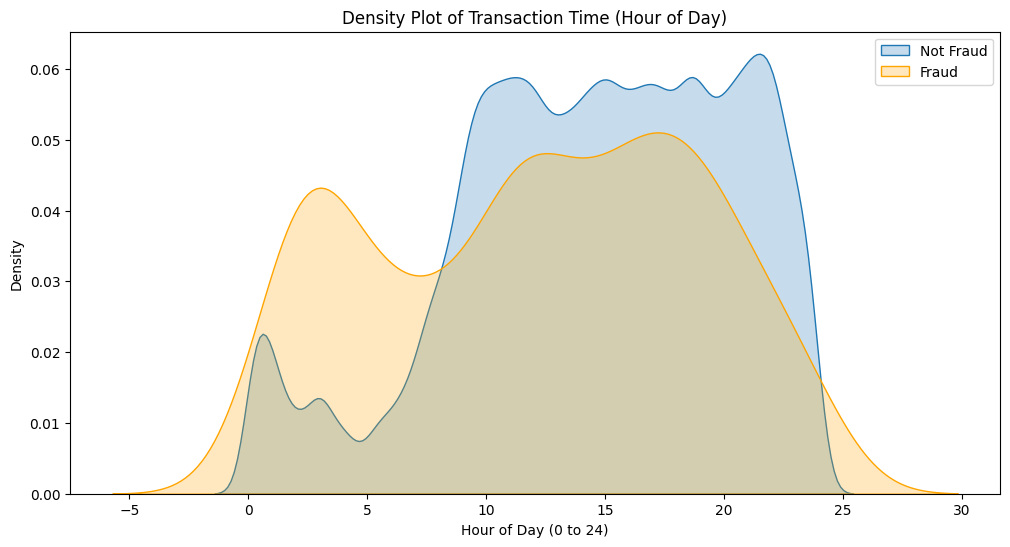

In [13]:
# Convert seconds to hour of the day (0 to 24)
df['Hour'] = (df['Time'] / 3600) % 24

# Create cyclic (sine and cosine) features
df['Hour_sin'] = np.sin(2 * np.pi * df['Hour'] / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour'] / 24)

#Creating the density plot using the Matplotlib library
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df[df['Class'] == 0], x='Hour', label='Not Fraud', fill=True)
sns.kdeplot(data=df[df['Class'] == 1], x='Hour', label='Fraud', fill=True, color='orange')

plt.title('Density Plot of Transaction Time (Hour of Day)')
plt.xlabel('Hour of Day (0 to 24)')
plt.ylabel('Density')
plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

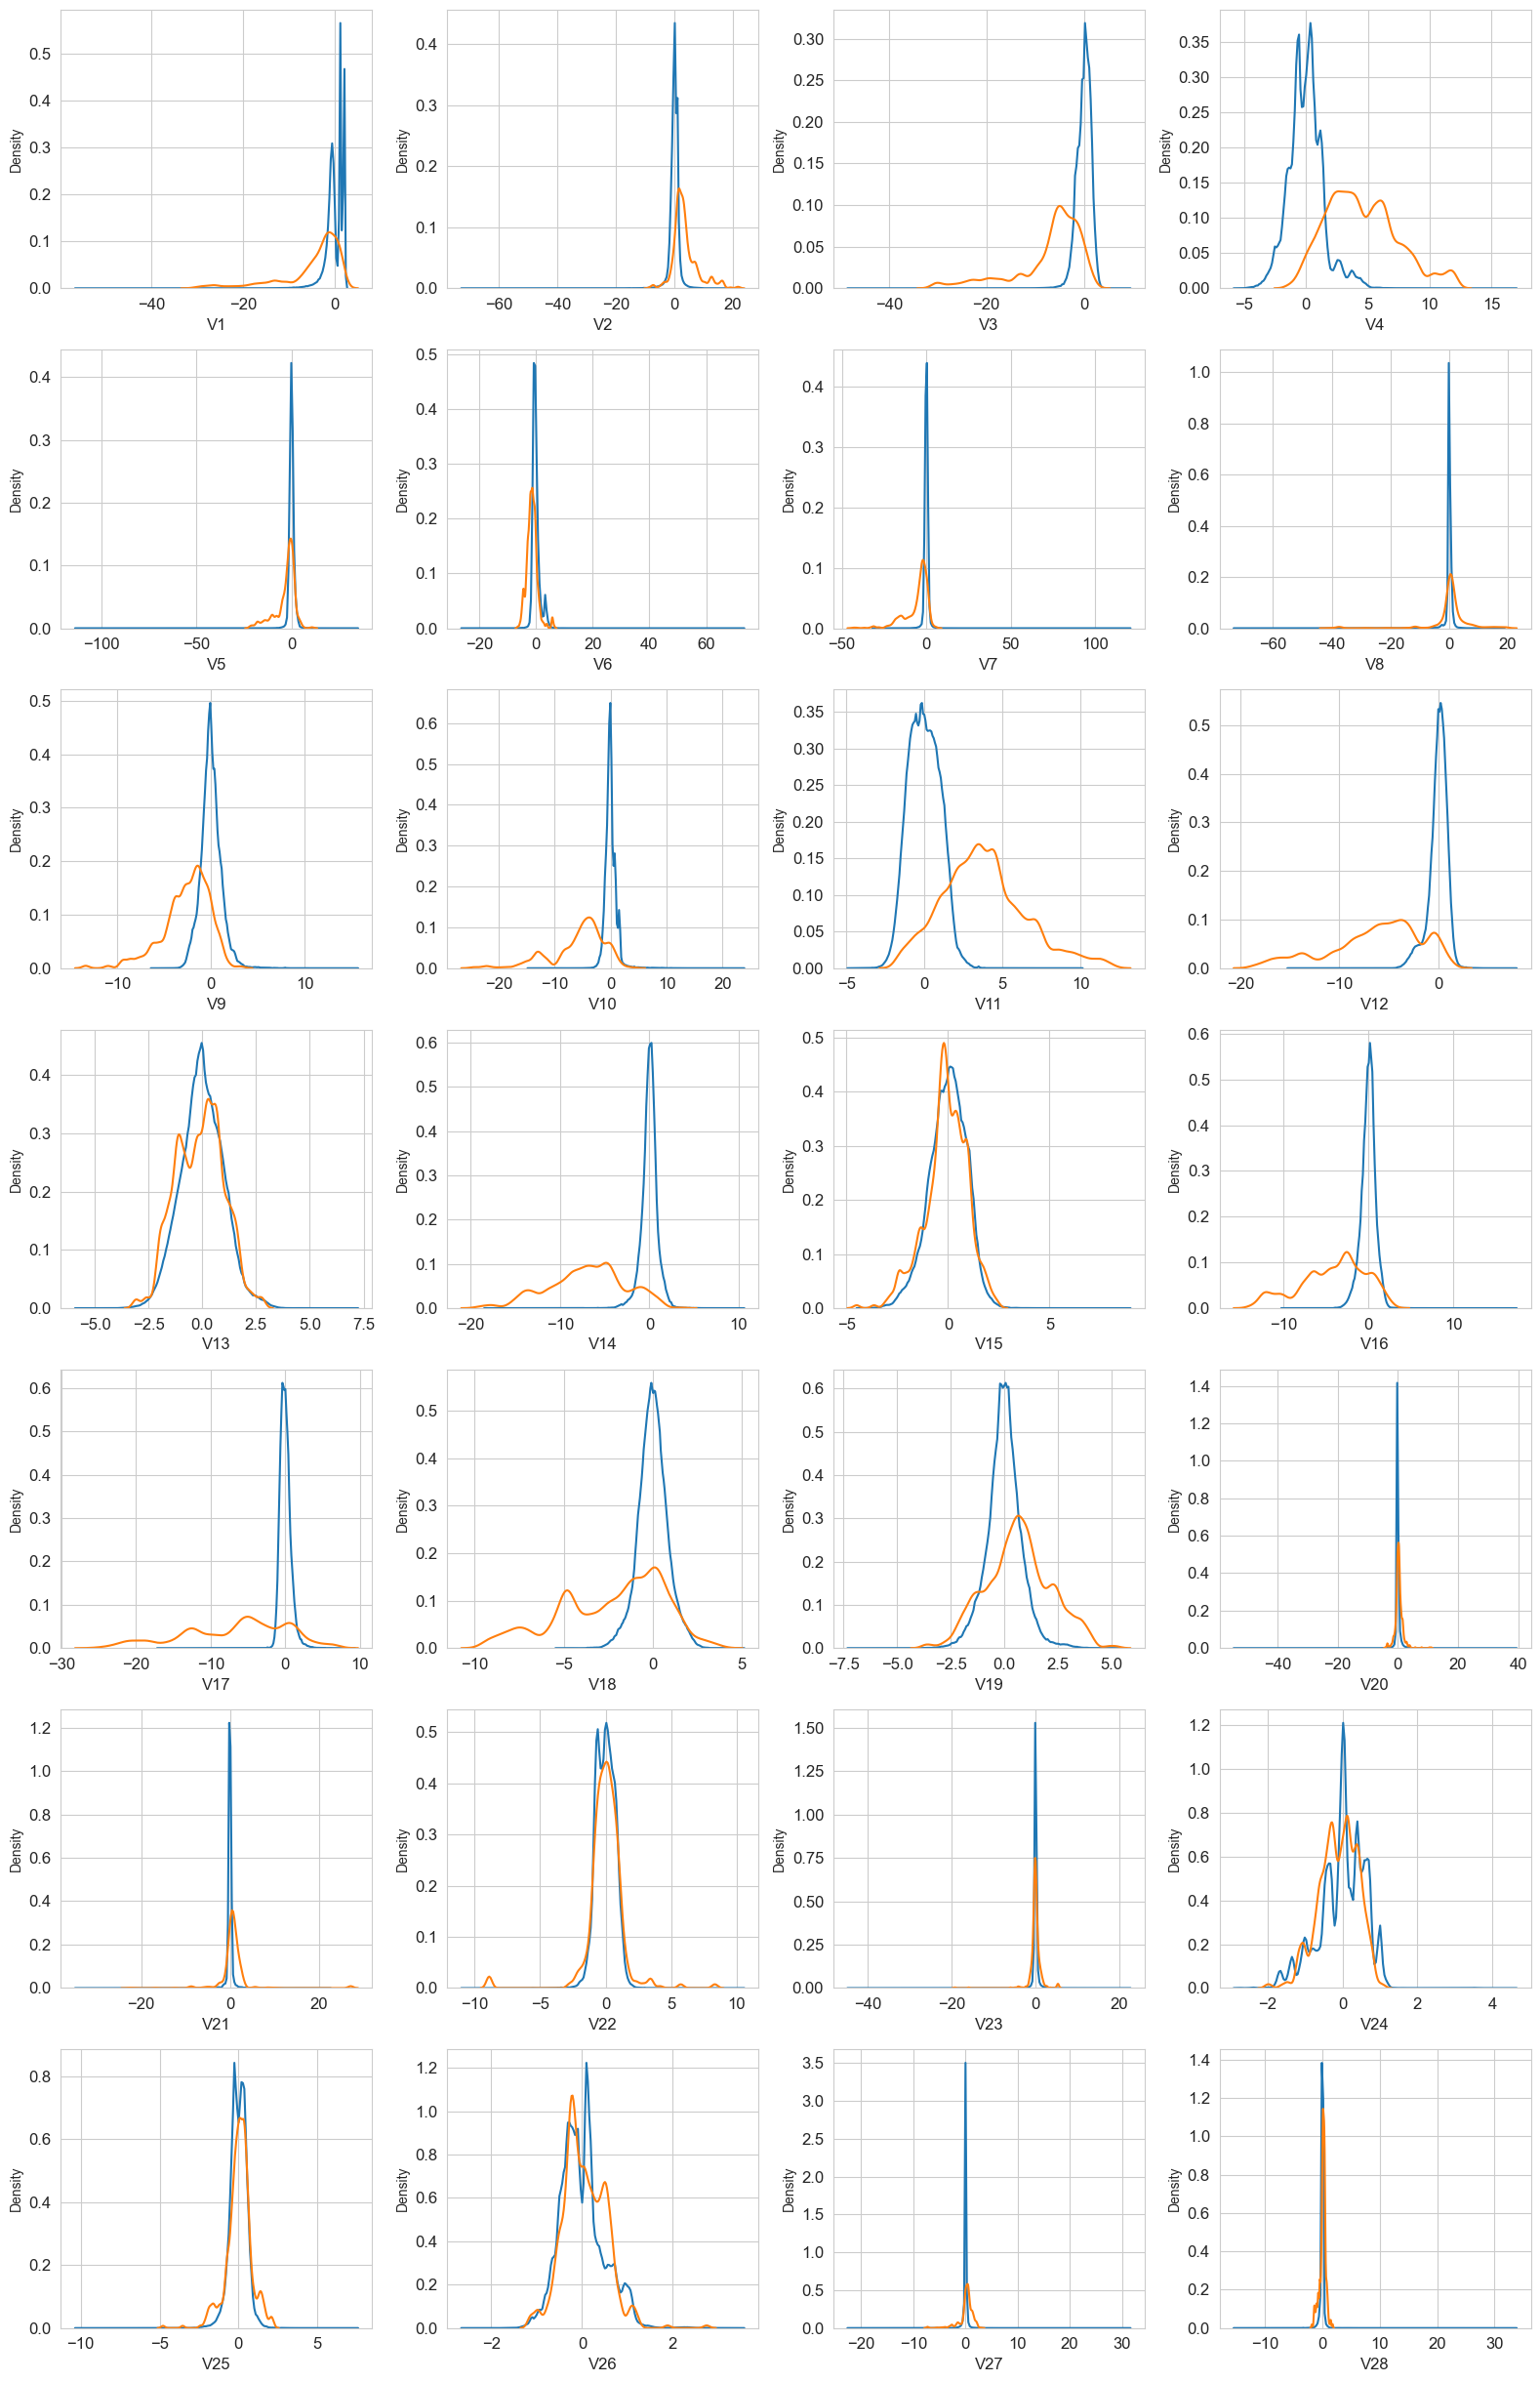

In [14]:
#Exclude 'Class', 'Hour', 'Hour_sin', 'Hour_cos', 'Time', and 'Amount' from the list of variables to plot
var = df.columns.values
var_to_plot = [feature for feature in var if feature not in
               ['Class', 'Hour', 'Hour_sin', 'Hour_cos', 'Time', 'Amount']]

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')

#Adjust the subplot grid size based on the number of features to plot
n_features = len(var_to_plot)
n_cols = 4
n_rows = 7

#Plotting the chart
plt.figure()
fig, ax = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3.5))

for feature in var_to_plot:
    i += 1
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class = 0")
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()

 3.1.  First, I will define the target variable we want to predict and the columns that will be used as input variables (predictors).

In [15]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']


In [16]:
train_df, test_df = train_test_split(df, test_size = 0.25, random_state =50, shuffle = True )
train_df, valid_df = train_test_split(df, test_size = 0.25, random_state = 50, shuffle = True )

In [17]:
train_df.head()

Time        V1        V2        V3        V4        V5        V6  \
136663   81812.0 -0.637773  0.821504  1.217670  0.963872  0.335284  0.068676   
241436  151024.0 -3.900993 -1.766061  0.405345 -0.691207 -1.358733  1.865156   
189667  128505.0 -0.213575  1.192956 -1.873186 -0.847498  0.423524 -0.016517   
213515  139285.0 -0.472565  1.380471 -0.694475 -0.931411  1.140695 -0.331906   
242420  151485.0 -1.515138  1.075044  0.612961 -0.777655 -0.705127  0.096034   

              V7        V8        V9  ...       V24       V25       V26  \
136663  0.565075  0.028909 -0.838926  ...  0.040575  0.057256 -0.228400   
241436 -1.735313  1.918787 -0.621806  ... -1.576386 -0.030288  0.039684   
189667 -1.155024 -5.477126 -0.784034  ...  0.750519  0.412949  0.097176   
213515  1.043101 -0.130684  0.442256  ...  0.164883 -0.275615  0.102418   
242420 -0.623410  1.261125  0.230335  ...  0.779627 -0.058945  0.590881   

             V27       V28  Amount  Class       Hour  Hour_sin  Hour_cos  
136663 -0.181264  0.062391   24.91      0  22.725556 -0.327493  0.944854  
241436  0.299465 -0.714685  255.50      0  17.951111 -0.999918 -0.012799  
189667  0.078387  0.333643   55.47      0  11.695833  0.079547 -0.996831  
213515  0.371590  0.041186    8.93      0  14.690278 -0.647511 -0.762057  
242420  0.197096  0.097476   17.09      0  18.079167 -0.999785  0.020724  

[5 rows x 34 columns]

In [18]:
train_df.isnull().sum().max()

np.int64(0)

In [19]:
clf = RandomForestClassifier(n_jobs = 4,
                             random_state = 50,
                             criterion = 'gini',
                             n_estimators = 100,
                             verbose = False)

In [20]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(n_jobs=4, random_state=50, verbose=False)

In [21]:
preds = clf.predict(valid_df[predictors])

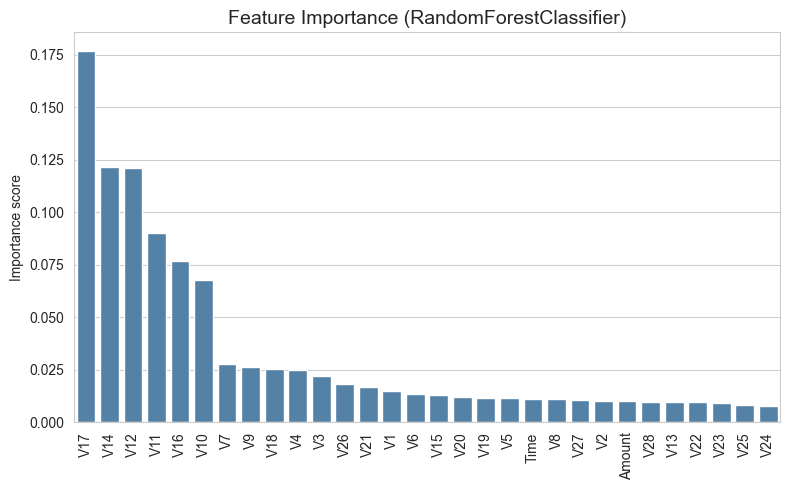

In [22]:
# Creating the figure
fig, ax = plt.subplots(figsize=(8, 5))

# Creating the DataFrame and sorting features by importance
tmp = (
    pd.DataFrame({
        'Feature': predictors,
        'Importance': clf.feature_importances_
    })
    .sort_values(by='Importance', ascending=False)
)

# Creating the bar plot to show feature importance
sns.barplot(x='Feature', y='Importance', data=tmp, ax=ax, color='steelblue')

#Adjusting the chart details
ax.set_xticks(range(len(tmp)))
ax.set_xticklabels(tmp['Feature'], rotation=90)
ax.set_title('Feature Importance (RandomForestClassifier)', fontsize=14)
ax.set_ylabel('Importance score')
ax.set_xlabel('')
plt.tight_layout()
plt.show()


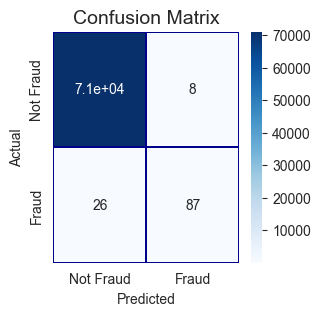

In [23]:
# Creating the confusion matrix from actual and predicted values
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

# Plotting the confusion matrix as a heatmap
fig, (ax1) = plt.subplots(ncols=1, figsize=(3, 3))
sns.heatmap(cm,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True, ax=ax1,
            linewidths=.2, linecolor="Darkblue", cmap="Blues")
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [24]:
roc_auc_score(valid_df[target].values, preds)

np.float64(0.884899484716715)

In [25]:
print(classification_report(valid_df[target].values, preds, digits=4))

              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     71089
           1     0.9158    0.7699    0.8365       113

    accuracy                         0.9995     71202
   macro avg     0.9577    0.8849    0.9181     71202
weighted avg     0.9995    0.9995    0.9995     71202



In [26]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

#What to monitor (in this case, train and valid)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {
    'objective' : 'binary:logistic',
    'eta' : 0.039,
    'max_depth' : 2,
    'subsample' : 0.8,
    'colsample_bytree' : 0.9,
    'eval_metric' : 'auc',
    'verbosity' : 0,      
    'seed' : 10
}

In [27]:
# Train the XGBoost model while monitoring training and validation sets
evals = [(dtrain, 'train'), (dvalid, 'valid')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    maximize=True,
    verbose_eval=50
)

[0]	train-auc:0.92287	valid-auc:0.92737
[50]	train-auc:0.98130	valid-auc:0.96946
[100]	train-auc:0.98902	valid-auc:0.97220
[150]	train-auc:0.99304	valid-auc:0.97600
[200]	train-auc:0.99501	valid-auc:0.97799
[250]	train-auc:0.99596	valid-auc:0.97946
[300]	train-auc:0.99691	valid-auc:0.97975
[350]	train-auc:0.99739	valid-auc:0.97943
[355]	train-auc:0.99742	valid-auc:0.97962


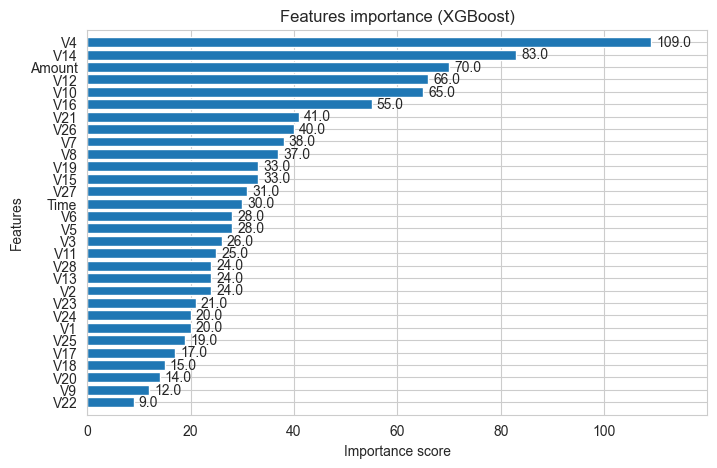

In [28]:
fig, (ax) = plt.subplots(ncols = 1, figsize = (8,5))
xgb.plot_importance(model, height = 0.8, title = "Features importance (XGBoost)", ax = ax)
plt.show()

In [29]:
nan_mask = test_df[target].isna()
print('Total NaNs em y_true:', nan_mask.sum())

Total NaNs em y_true: 0


In [30]:
# Calculate the best classification threshold based on the highest F1-score
y_pred_proba = model.predict(dtest)
precisions, recalls, thresholds = precision_recall_curve(test_df[target], y_pred_proba)

# Compute F1-scores for each threshold and select the one that maximizes it
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
best_thresh = thresholds[f1_scores.argmax()]
print(f"Best threshold: {best_thresh:.4f}")

Best threshold: 0.4594


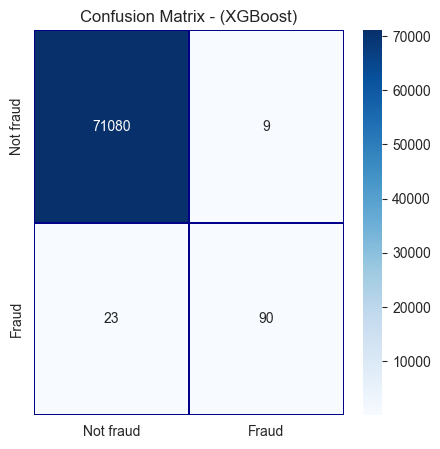

In [31]:
# Apply the best threshold to classify predictions and compare them to actual values
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba >= best_thresh).astype(int)
y_true = test_df[target].values

# Generate and plot the confusion matrix for XGBoost predictions
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Not fraud', 'Fraud'],
            yticklabels=['Not fraud', 'Fraud'],
            linewidths=.2, linecolor='Darkblue', ax=ax)
ax.set_title(f'Confusion Matrix - (XGBoost)')
plt.show()

In [32]:
preds = model.predict(dtest)
roc_auc_score(test_df[target].values, preds)

np.float64(0.9796299217097552)

In [33]:
print(classification_report(y_true, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     71089
           1     0.9091    0.7965    0.8491       113

    accuracy                         0.9996     71202
   macro avg     0.9544    0.8982    0.9244     71202
weighted avg     0.9995    0.9996    0.9995     71202

